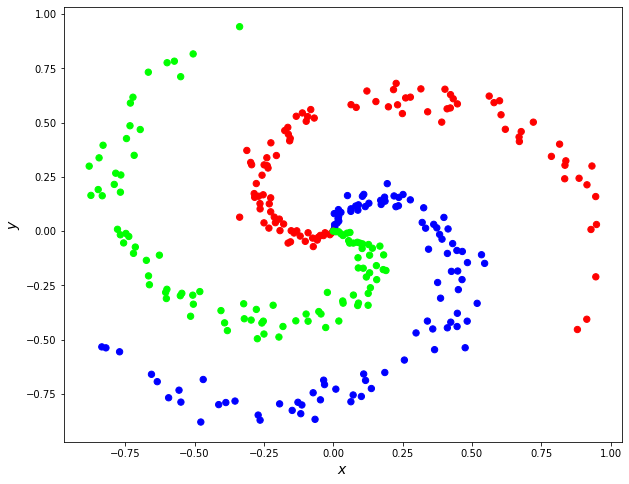

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import torch

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='int64')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.brg)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [6]:
# from numpy import numpy as np
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y))
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


In [7]:
ndim_in = 2 # размерность входа (то есть количество признаков)
ndim_out = 3 # размерность выходного слоя (то есть количество классов)
num_epochs = 200#
learning_rate = 0.005#

neuron = torch.nn.Sequential(
    torch.nn.Linear(ndim_in, ndim_out),
)

loss_fn = torch.nn.CrossEntropyLoss()#

optimizer = torch.optim.Adam(neuron.parameters(), lr=learning_rate)#

for i in range(num_epochs):
    y_pred = neuron(X)

    loss = loss_fn(y_pred, y)
    if i % 50 == 0:
        print(f'Iter: {i} -> Loss: {loss.data}')

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

Iter: 0 -> Loss: 1.2355824708938599
Iter: 50 -> Loss: 1.111383318901062
Iter: 100 -> Loss: 1.0279234647750854
Iter: 150 -> Loss: 0.965116560459137


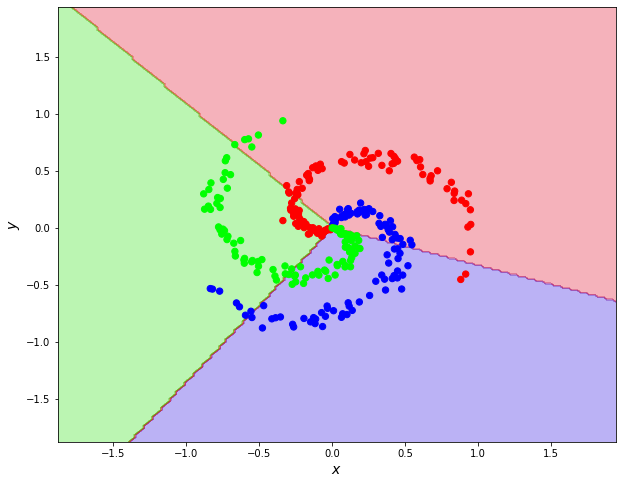

In [8]:
X = X.data.numpy()
y = y.data.numpy()

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
 
Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
 
plt.figure(figsize=(10, 8))
 
plt.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.brg)
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
 
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();